In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load Data

In [2]:
dfa = pd.read_csv("Client_A.csv")
dfb = pd.read_csv("Client_B.csv")
dfc = pd.read_csv("Client_C.csv")

C:\Users\gerasimos\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,6,7,10,13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\gerasimos\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
#create one dataframe and set a client column to identify the client
dfa["Client"] = "A"
dfb["Client"] = "B"
dfc["Client"] = "C"

df = pd.concat([dfa, dfb, dfc])

In [4]:
df.head()

,UniqueID,InvoiceNumber,InvoiceAmount,BaseAmount,InvoiceDate,EnteredDate,PONumber,SupplierRef,PaidDate,PaymentStatus,DocumentType,PaymentType,ModifiedDate,UserID,PostedDate,Invoicecurrency,ConfirmedRisk,Client
0,1002318,3090374,1.78,1.78,2016-12-18 00:00:00,2016-03-10 00:00:00,CI03271,ONE007,2016-06-07 00:00:00,F,PI,PB,2021-07-16 13:20:05.177,SB24,2016-03-11 00:00:00,GBP,0.0,A
1,1007468,AG90948,50.23,50.23,2019-03-23 00:00:00,2016-04-04 00:00:00,CC18126,XMA001,2016-06-01 00:00:00,F,PI,PB,2021-07-16 13:20:05.177,DT61,2016-04-04 00:00:00,GBP,NaN,A
2,1012303,191442,639.00,639.00,2016-12-22 00:00:00,2016-04-26 00:00:00,EF04732,LAN080,2016-07-12 00:00:00,F,PI,PB,2021-07-16 13:20:05.177,SB24,2016-05-03 00:00:00,GBP,NaN,A
3,1012304,181441,1045.00,1045.00,2016-12-22 00:00:00,2016-04-26 00:00:00,EF04733,LAN080,2016-07-12 00:00:00,F,PI,PB,2021-07-16 13:20:05.177,SB24,2016-05-03 00:00:00,GBP,NaN,A
4,1027512,M2419654,33.73,33.73,2019-06-22 00:00:00,2016-07-14 00:00:00,LR30329,DAW002,2016-09-06 00:00:00,F,PI,PB,2021-07-16 13:20:05.177,DT61,2016-07-18 00:00:00,GBP,NaN,A


# Data Preprocesing

In [5]:
#drop columns that dont provide any information for analysis (id codes)
df.drop(["UniqueID", "InvoiceNumber", "PONumber"], axis=1, inplace=True)

In [6]:
#transform date values to datetime type
df[["InvoiceDate", "EnteredDate", 
    "ModifiedDate", "PostedDate", "PaidDate"]] = df[["InvoiceDate", "EnteredDate", 
                                                     "ModifiedDate", "PostedDate", "PaidDate"]].apply(pd.to_datetime)

In [7]:
#check if there are entries with dates laters than 2021
df[df["InvoiceDate"].dt.year>2021]

,InvoiceAmount,BaseAmount,InvoiceDate,EnteredDate,SupplierRef,PaidDate,PaymentStatus,DocumentType,PaymentType,ModifiedDate,UserID,PostedDate,Invoicecurrency,ConfirmedRisk,Client
98938,2448.00,2448.00,2022-02-03 00:00:00,2016-04-26 00:00:00,100149,2016-05-31,Electronic,Standard,Electronic,2021-07-16 13:14:19.550,BARBARA.GARSIDE,2016-04-26 00:00:00,GBP,NaN,B
98940,186.00,186.00,2024-02-03 00:00:00,2016-04-26 00:00:00,100149,2016-05-31,Electronic,Standard,Electronic,2021-07-16 13:14:19.550,BARBARA.GARSIDE,2016-04-26 00:00:00,GBP,NaN,B
136173,10.00,10.00,2046-07-31 00:00:00,2016-08-05 00:00:00,400689,2016-11-25,Electronic,Standard,Electronic,2021-07-16 13:14:19.550,BARBARA.GARSIDE,2016-08-05 00:00:00,GBP,0.0,B
192842,65.11,65.11,2026-04-05 00:00:00,2017-01-11 00:00:00,401064,2017-03-23,Electronic,Standard,Electronic,2021-07-16 13:14:19.550,BARBARA.GARSIDE,2017-01-11 00:00:00,GBP,NaN,B
209571,56.90,56.90,2022-07-13 00:00:00,2017-02-23 00:00:00,100202,2017-03-07,Electronic,Standard,Electronic,2021-07-16 13:14:19.550,BARBARA.GARSIDE,2017-02-23 00:00:00,GBP,NaN,B
209575,56.90,56.90,2026-07-13 00:00:00,2017-02-23 00:00:00,100202,2017-03-07,Electronic,Standard,Electronic,2021-07-16 13:14:19.550,BARBARA.GARSIDE,2017-02-23 00:00:00,GBP,NaN,B
209576,56.90,56.90,2027-07-13 00:00:00,2017-02-23 00:00:00,100202,2017-03-07,Electronic,Standard,Electronic,2021-07-16 13:14:19.550,BARBARA.GARSIDE,2017-02-23 00:00:00,GBP,NaN,B
421258,0.00,0.00,2023-03-20 00:00:00,2016-02-04 00:00:00,100205,NaT,NaN,NaN,NaN,2021-07-16 13:14:19.550,HELEN.MULLEN,2016-02-04 00:00:00,GBP,NaN,B
579788,0.00,0.00,2029-01-01 00:00:00,2020-01-09 00:00:00,401581,NaT,NaN,NaN,NaN,2021-07-16 13:14:19.550,BARBARA.GARSIDE,2020-01-09 00:00:00,GBP,NaN,B
636984,33.54,33.54,2040-07-08 12:07:00,2021-01-18 09:01:05,400783,NaT,Not Paid,STANDARD,NaN,2021-07-16 13:14:19.550,BARBARA.GARSIDE,2021-01-17 12:01:00,GBP,NaN,B


In [8]:
#replace with nan invoice dates after 2021 
df["InvoiceDate"].loc[df["InvoiceDate"].dt.year>2021] = np.nan
df["EnteredDate"].loc[df["EnteredDate"].dt.year>2021] = np.nan
df["ModifiedDate"].loc[df["ModifiedDate"].dt.year>2021] = np.nan
df["PaidDate"].loc[df["PaidDate"].dt.year>2021] = np.nan

C:\Users\gerasimos\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\gerasimos\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\gerasimos\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

In [9]:
#check whether invoice amount and base amount have different values
df[df["InvoiceAmount"]!=df["BaseAmount"]]

,InvoiceAmount,BaseAmount,InvoiceDate,EnteredDate,SupplierRef,PaidDate,PaymentStatus,DocumentType,PaymentType,ModifiedDate,UserID,PostedDate,Invoicecurrency,ConfirmedRisk,Client


Since there are different currencies and based on the description of BaseAmount from the provided pdf should exist entries with different values of Invoice Amount and BaseAmount ???

In [10]:
#since invoice and base amount are everywhere the same drop one of the two columns
df.drop("BaseAmount", axis=1, inplace=True)

In [11]:
#check different types of document type
df["DocumentType"].unique()

array(['PI', 'PC', 'PD', 'INV', 'CRN', 'Standard', 'Credit Memo', nan,
       'CREDIT', 'STANDARD', 'PV', 'PX', 'PL', 'PM', 'PR', 'XB'],
      dtype=object)

In [12]:
#replace STANDARD with Standard

df['DocumentType'] = df['DocumentType'].replace("Standard",'STANDARD')

In [13]:
#check different currencies
df["Invoicecurrency"].unique()

array(['GBP', 'gbp', 'RON', 'EUR', 'USD', 'CHF', 'NOK', 'DKK', 'PLN',
       'AUD'], dtype=object)

In [14]:
#replace gbp with GBP
df['Invoicecurrency'] = df['Invoicecurrency'].replace("gbp","GBP")

In [15]:
df.head()

,InvoiceAmount,InvoiceDate,EnteredDate,SupplierRef,PaidDate,PaymentStatus,DocumentType,PaymentType,ModifiedDate,UserID,PostedDate,Invoicecurrency,ConfirmedRisk,Client
0,1.78,2016-12-18,2016-03-10,ONE007,2016-06-07,F,PI,PB,2021-07-16 13:20:05.177,SB24,2016-03-11,GBP,0.0,A
1,50.23,2019-03-23,2016-04-04,XMA001,2016-06-01,F,PI,PB,2021-07-16 13:20:05.177,DT61,2016-04-04,GBP,NaN,A
2,639.00,2016-12-22,2016-04-26,LAN080,2016-07-12,F,PI,PB,2021-07-16 13:20:05.177,SB24,2016-05-03,GBP,NaN,A
3,1045.00,2016-12-22,2016-04-26,LAN080,2016-07-12,F,PI,PB,2021-07-16 13:20:05.177,SB24,2016-05-03,GBP,NaN,A
4,33.73,2019-06-22,2016-07-14,DAW002,2016-09-06,F,PI,PB,2021-07-16 13:20:05.177,DT61,2016-07-18,GBP,NaN,A


# Feature Engineering

## Invoice Amount

<AxesSubplot:>

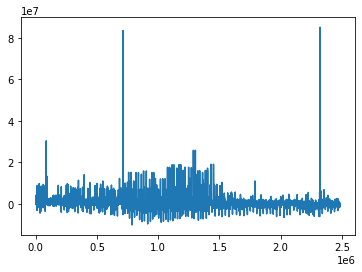

In [16]:
df["InvoiceAmount"].plot()

In [17]:
#check the peaks of the above plot
df[df["InvoiceAmount"]>3*10**7]

,InvoiceAmount,InvoiceDate,EnteredDate,SupplierRef,PaidDate,PaymentStatus,DocumentType,PaymentType,ModifiedDate,UserID,PostedDate,Invoicecurrency,ConfirmedRisk,Client
85025,30361540.9,2016-03-24 00:00:00,2016-03-29 00:00:00,401666,2016-03-24,Wire,STANDARD,Wire,2021-07-16 13:14:19.550,PAMELA.DOWNEY,2016-03-29 00:00:00,GBP,NaN,B
713103,83464814.0,2021-02-18 12:02:00,2021-02-25 12:02:10,401817,NaT,Not Paid,STANDARD,NaN,2021-07-16 13:14:19.550,20660,2021-02-25 12:02:00,GBP,NaN,B
2322656,85042167.0,2020-11-30 00:00:00,2020-12-14 00:00:00,8176049,NaT,A,PV,NaN,2021-07-16 13:11:56.760,MORGANS1,NaT,GBP,NaN,C


In [18]:
#categorise transactions by the amount of invoice

amount_category = df["InvoiceAmount"].apply(lambda x: "<100" if abs(x)<=100 
                                                  else ("100-1k" if 100<abs(x)<=1000
                                                        else ("1k-10k" if 1000<abs(x)<=10000
                                                              else ("10k-100k" if 10000<abs(x)<=100000
                                                                    else(">100k" if abs(x)>100000
                                                                         else x
                                                                        )
                                                              )
                                                        )
                                                       )
                                                 )

df.insert(1, "AmountCategory",amount_category)

In [19]:
df.head(3)

,InvoiceAmount,AmountCategory,InvoiceDate,EnteredDate,SupplierRef,PaidDate,PaymentStatus,DocumentType,PaymentType,ModifiedDate,UserID,PostedDate,Invoicecurrency,ConfirmedRisk,Client
0,1.78,<100,2016-12-18,2016-03-10,ONE007,2016-06-07,F,PI,PB,2021-07-16 13:20:05.177,SB24,2016-03-11,GBP,0.0,A
1,50.23,<100,2019-03-23,2016-04-04,XMA001,2016-06-01,F,PI,PB,2021-07-16 13:20:05.177,DT61,2016-04-04,GBP,NaN,A
2,639.00,100-1k,2016-12-22,2016-04-26,LAN080,2016-07-12,F,PI,PB,2021-07-16 13:20:05.177,SB24,2016-05-03,GBP,NaN,A


## Dates

In [20]:
#add year of Invoice and Paid
invoice_year = df["InvoiceDate"].dt.year
df.insert(3, "InvoiceYear", invoice_year)

paid_year = df["PaidDate"].dt.year
df.insert(7, "PaidYear" ,paid_year)

It might would be interesting to see the time it takes for the clients to enter the transaction to the system as well as to pay supplier after the invoice date

In [21]:
#add two columns to show the days between Invoice and Entered Date and Invoice and Paid Date
days_to_enter = (df["EnteredDate"] - df['InvoiceDate']).dt.days

df.insert(5, "Days_to_Enter",days_to_enter)

days_to_pay = (df["PaidDate"] - df["InvoiceDate"]).dt.days

df.insert(8, "Days_to_Pay",days_to_pay)

In [22]:
df.head()

,InvoiceAmount,AmountCategory,InvoiceDate,InvoiceYear,EnteredDate,Days_to_Enter,SupplierRef,PaidDate,Days_to_Pay,PaidYear,PaymentStatus,DocumentType,PaymentType,ModifiedDate,UserID,PostedDate,Invoicecurrency,ConfirmedRisk,Client
0,1.78,<100,2016-12-18,2016.0,2016-03-10,-283.0,ONE007,2016-06-07,-194.0,2016.0,F,PI,PB,2021-07-16 13:20:05.177,SB24,2016-03-11,GBP,0.0,A
1,50.23,<100,2019-03-23,2019.0,2016-04-04,-1083.0,XMA001,2016-06-01,-1025.0,2016.0,F,PI,PB,2021-07-16 13:20:05.177,DT61,2016-04-04,GBP,NaN,A
2,639.00,100-1k,2016-12-22,2016.0,2016-04-26,-240.0,LAN080,2016-07-12,-163.0,2016.0,F,PI,PB,2021-07-16 13:20:05.177,SB24,2016-05-03,GBP,NaN,A
3,1045.00,1k-10k,2016-12-22,2016.0,2016-04-26,-240.0,LAN080,2016-07-12,-163.0,2016.0,F,PI,PB,2021-07-16 13:20:05.177,SB24,2016-05-03,GBP,NaN,A
4,33.73,<100,2019-06-22,2019.0,2016-07-14,-1073.0,DAW002,2016-09-06,-1019.0,2016.0,F,PI,PB,2021-07-16 13:20:05.177,DT61,2016-07-18,GBP,NaN,A


The timeline of the dates is : Invoice Date --> Entered Date ---> Posted Date ----> Paid Date

Negative values in Days to enter and days to pay indicate an error where invoice date is not the first date in the timeline 

In [23]:
#set negative values for Days to Enter and Days to pay to nan

df["Days_to_Enter"] = df["Days_to_Enter"].apply(lambda x: np.nan if x<0 else x)
df["Days_to_Pay"] = df["Days_to_Pay"].apply(lambda x: np.nan if x<0 else x)

## Invoice / Credit 

In [24]:
#when (invoice amount > 0) ----> invoice,     when (invoice amount < 0)-----> credit

df["InvoiceType"] = df["InvoiceAmount"].apply(lambda x: "Invoice" if x>=0 else "Credit")

In [25]:
# after processing data split again the total dataframe to three datasets one for each client in case is needed
dfa=df[df["Client"]=="A"]
dfb=df[df["Client"]=="B"]
dfc=df[df["Client"]=="C"]

In [26]:
#save the preprocessed data for task 2 (modelling)

df.to_csv("preprocessed_data.csv", index=False)

# EDA

In [27]:
df.head()

,InvoiceAmount,AmountCategory,InvoiceDate,InvoiceYear,EnteredDate,Days_to_Enter,SupplierRef,PaidDate,Days_to_Pay,PaidYear,PaymentStatus,DocumentType,PaymentType,ModifiedDate,UserID,PostedDate,Invoicecurrency,ConfirmedRisk,Client,InvoiceType
0,1.78,<100,2016-12-18,2016.0,2016-03-10,NaN,ONE007,2016-06-07,NaN,2016.0,F,PI,PB,2021-07-16 13:20:05.177,SB24,2016-03-11,GBP,0.0,A,Invoice
1,50.23,<100,2019-03-23,2019.0,2016-04-04,NaN,XMA001,2016-06-01,NaN,2016.0,F,PI,PB,2021-07-16 13:20:05.177,DT61,2016-04-04,GBP,NaN,A,Invoice
2,639.00,100-1k,2016-12-22,2016.0,2016-04-26,NaN,LAN080,2016-07-12,NaN,2016.0,F,PI,PB,2021-07-16 13:20:05.177,SB24,2016-05-03,GBP,NaN,A,Invoice
3,1045.00,1k-10k,2016-12-22,2016.0,2016-04-26,NaN,LAN080,2016-07-12,NaN,2016.0,F,PI,PB,2021-07-16 13:20:05.177,SB24,2016-05-03,GBP,NaN,A,Invoice
4,33.73,<100,2019-06-22,2019.0,2016-07-14,NaN,DAW002,2016-09-06,NaN,2016.0,F,PI,PB,2021-07-16 13:20:05.177,DT61,2016-07-18,GBP,NaN,A,Invoice


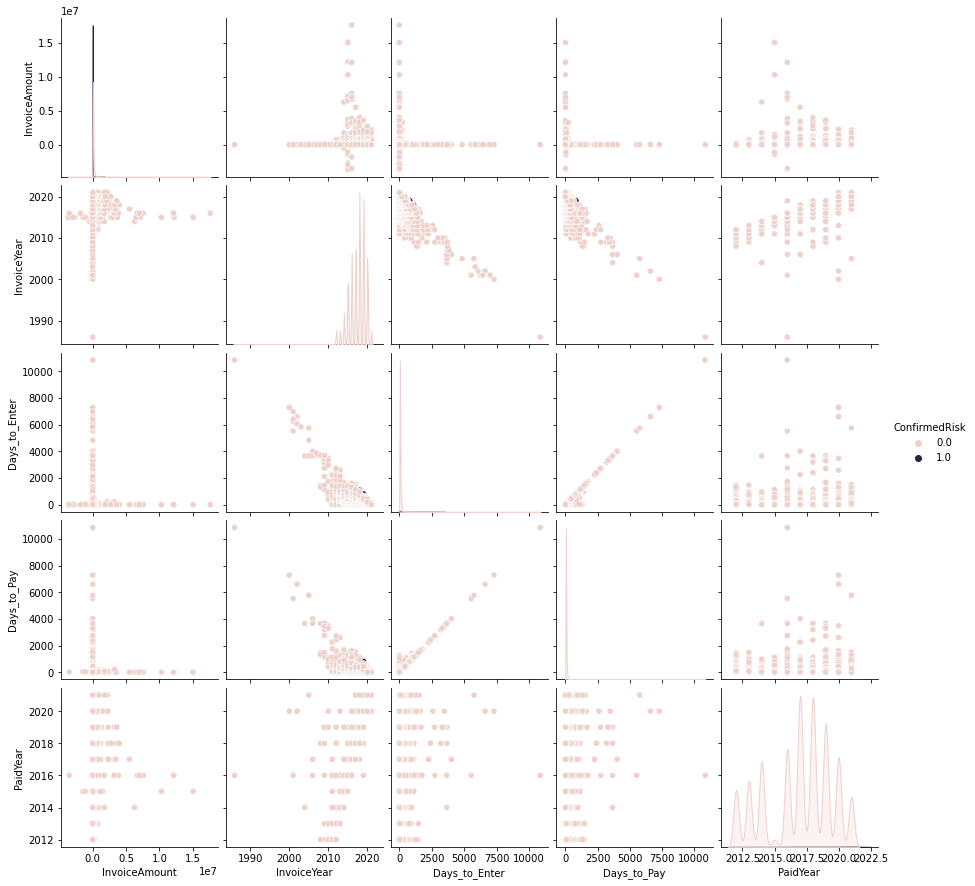

In [28]:
sns.pairplot(data=df, hue="ConfirmedRisk")

<AxesSubplot:>

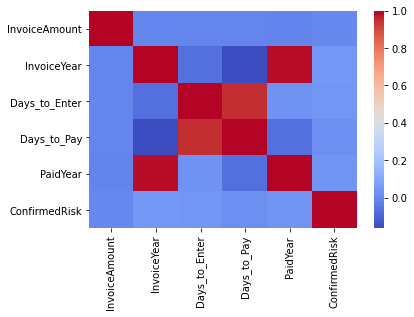

In [29]:
sns.heatmap(df.corr(), cmap="coolwarm")

# Suppliers

Text(0, 0.5, 'Number of Suppliers')

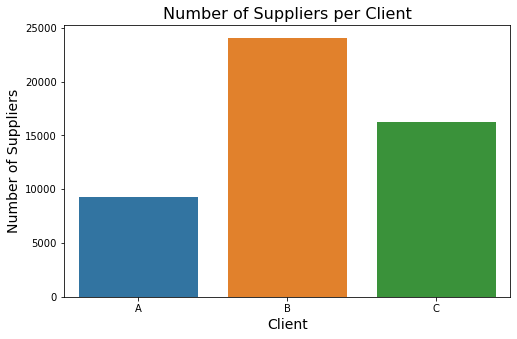

In [30]:
# Number of Suppliers per client
num_suppliers_a = dfa["SupplierRef"].nunique()
num_suppliers_b = dfb["SupplierRef"].nunique()
num_suppliers_c = dfc["SupplierRef"].nunique()

plt.figure(figsize=(8,5))

sns.barplot(x=["A", "B", "C"], y=[num_suppliers_a, num_suppliers_b, num_suppliers_c])
plt.title("Number of Suppliers per Client", fontsize=16)
plt.xlabel("Client" , fontsize=14)
plt.ylabel("Number of Suppliers" , fontsize=14)

Text(0, 0.5, 'Average Invoice Amount per supplier')

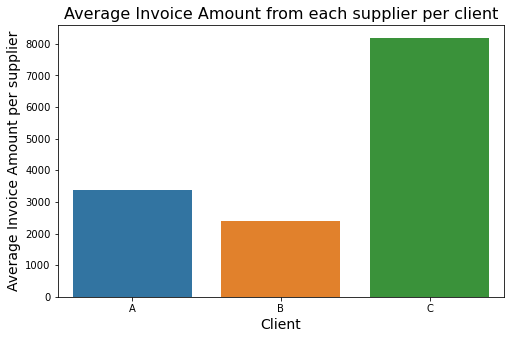

In [31]:
# avg invoice amount from each supplier on average
avg_amount_sup_a = dfa.groupby("SupplierRef").mean()["InvoiceAmount"].mean()
avg_amount_sup_b = dfb.groupby("SupplierRef").mean()["InvoiceAmount"].mean()
avg_amount_sup_c = dfc.groupby("SupplierRef").mean()["InvoiceAmount"].mean()

plt.figure(figsize=(8,5))

sns.barplot(x=["A", "B", "C"], y=[avg_amount_sup_a, avg_amount_sup_b, avg_amount_sup_c])
plt.title("Average Invoice Amount from each supplier per client", fontsize=16)
plt.xlabel("Client" , fontsize=14)
plt.ylabel("Average Invoice Amount per supplier" , fontsize=14)

## Invoice Amount

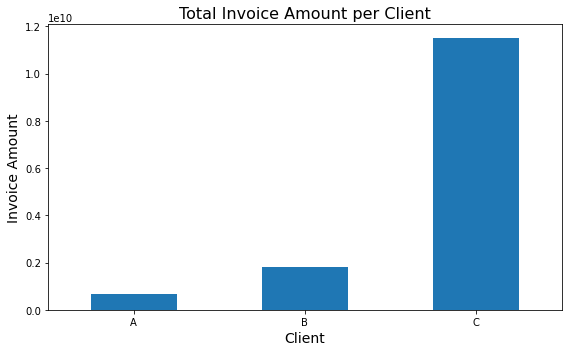

In [32]:
#total invoice amount per client 
plt.figure(figsize=(8,5))
df.groupby("Client").sum()["InvoiceAmount"].plot(kind="bar")
plt.title("Total Invoice Amount per Client", fontsize=16)
plt.ylabel("Invoice Amount", fontsize=14)
plt.xlabel("Client", fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()

## Number of transactions

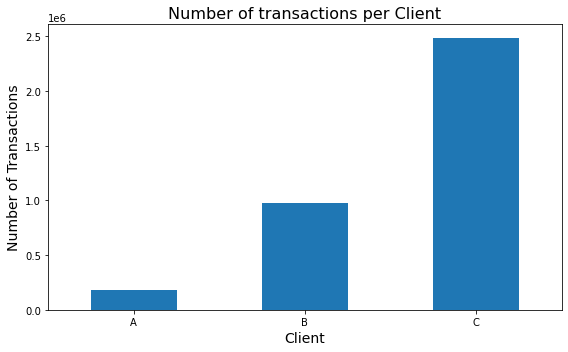

In [33]:
#total number of transactions per client 
plt.figure(figsize=(8,5))
df.groupby("Client").count()["InvoiceAmount"].plot(kind="bar")
plt.title("Number of transactions per Client", fontsize=16)
plt.ylabel("Number of Transactions", fontsize=14)
plt.xlabel("Client", fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()

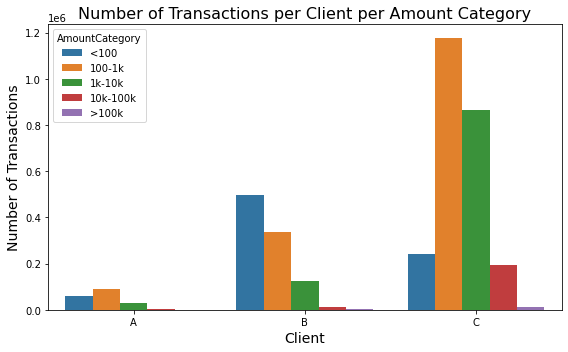

In [34]:
#number of transactions per client per amount category 
plt.figure(figsize=(8,5))
sns.countplot(x='Client', data=df, hue="AmountCategory")
plt.title("Number of Transactions per Client per Amount Category", fontsize=16)
plt.ylabel("Number of Transactions", fontsize=14)
plt.xlabel("Client", fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()

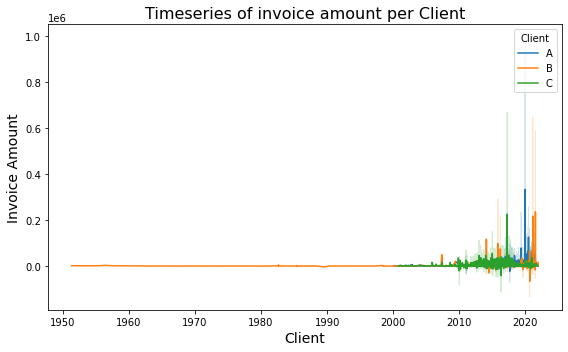

In [35]:
#timeseries of invocie amount per client

plt.figure(figsize=(8,5))
sns.lineplot(x="InvoiceDate", y="InvoiceAmount", data=df, hue="Client")
plt.title("Timeseries of invoice amount per Client", fontsize=16)
plt.ylabel("Invoice Amount", fontsize=14)
plt.xlabel("Client", fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()

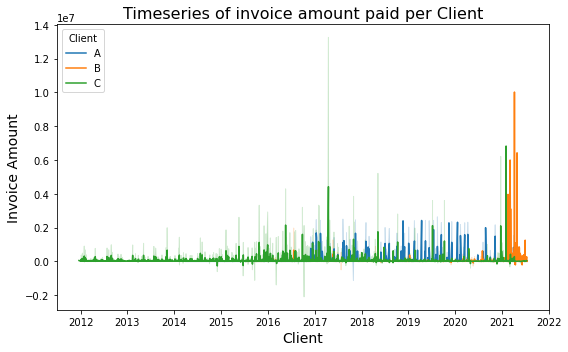

In [36]:
#timeseries of invocie amount per client

plt.figure(figsize=(8,5))
sns.lineplot(x="PaidDate", y="InvoiceAmount", data=df, hue="Client")
plt.title("Timeseries of invoice amount paid per Client", fontsize=16)
plt.ylabel("Invoice Amount", fontsize=14)
plt.xlabel("Client", fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()

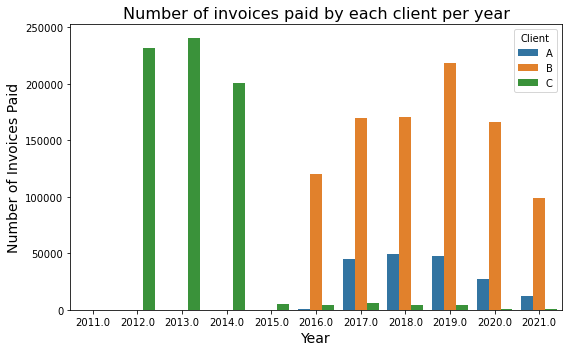

In [37]:
#timeseries of invocie amount per client

plt.figure(figsize=(8,5))
sns.countplot(x="PaidYear", data=df, hue="Client")
plt.title("Number of invoices paid by each client per year", fontsize=16)
plt.ylabel("Number of Invoices Paid", fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()

# Risk

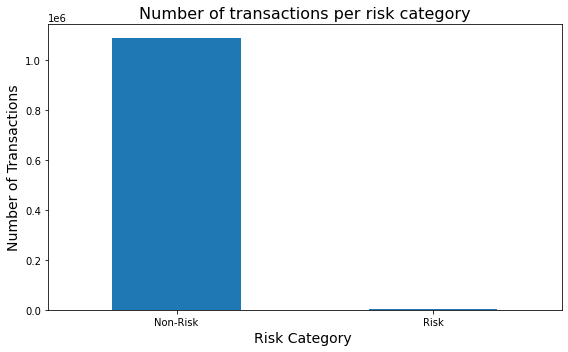

In [38]:
#number of transactions per risk category 
plt.figure(figsize=(8,5))
df.groupby("ConfirmedRisk").count()["InvoiceAmount"].plot(kind="bar")
plt.title("Number of transactions per risk category", fontsize=16)
plt.ylabel("Number of Transactions", fontsize=14)
plt.xlabel("Risk Category ", fontsize=14)
plt.xticks([0, 1], ['Non-Risk', 'Risk'], rotation=0)
plt.tight_layout()

# Invoice Type

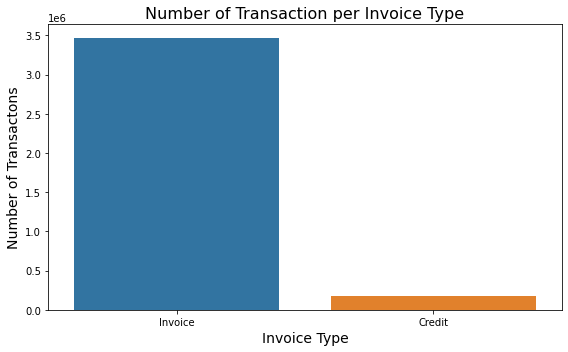

In [39]:
#number of transactions per invoice type (Invoice / Credit)
 
plt.figure(figsize=(8,5))
sns.countplot(x="InvoiceType", data=df)
plt.title("Number of Transaction per Invoice Type", fontsize=16)
plt.ylabel("Number of Transactons", fontsize=14)
plt.xlabel("Invoice Type", fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()

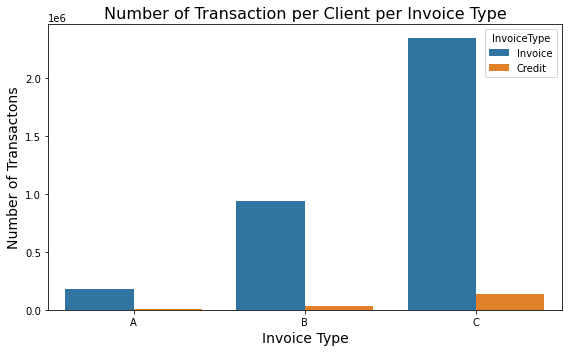

In [40]:
#number of transactions per client per invoice type (Invoice / Credit)
 
plt.figure(figsize=(8,5))
sns.countplot(x="Client", data=df, hue="InvoiceType")
plt.title("Number of Transaction per Client per Invoice Type", fontsize=16)
plt.ylabel("Number of Transactons", fontsize=14)
plt.xlabel("Invoice Type", fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()

## Days to enter the system

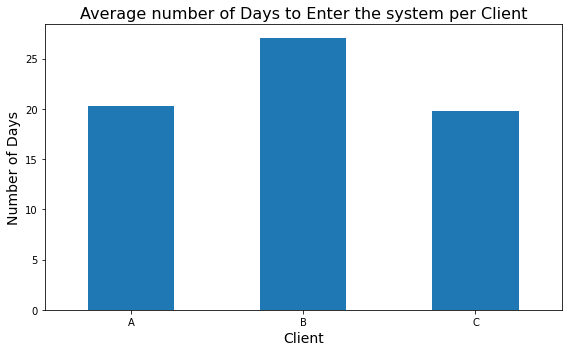

In [41]:
#check days it takes for the invoice to enter the system on average per client 
 
plt.figure(figsize=(8,5))
df.groupby("Client").mean()["Days_to_Enter"].plot(kind="bar")
plt.title("Average number of Days to Enter the system per Client", fontsize=16)
plt.ylabel("Number of Days", fontsize=14)
plt.xlabel("Client", fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()

## Days to pay the invoice

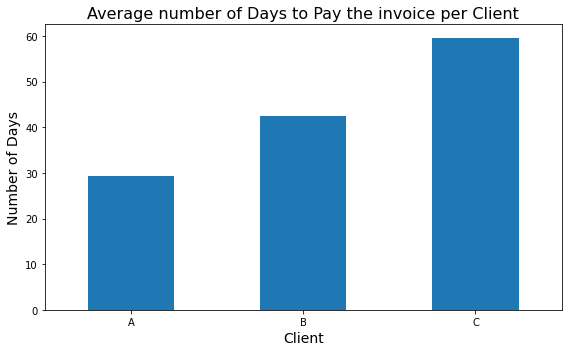

In [42]:
#check days it takes to pay the invoice on average per client
 
plt.figure(figsize=(8,5))
df.groupby("Client").mean()["Days_to_Pay"].plot(kind="bar")
plt.title("Average number of Days to Pay the invoice per Client", fontsize=16)
plt.ylabel("Number of Days", fontsize=14)
plt.xlabel("Client", fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()

## Plot Categorical Features

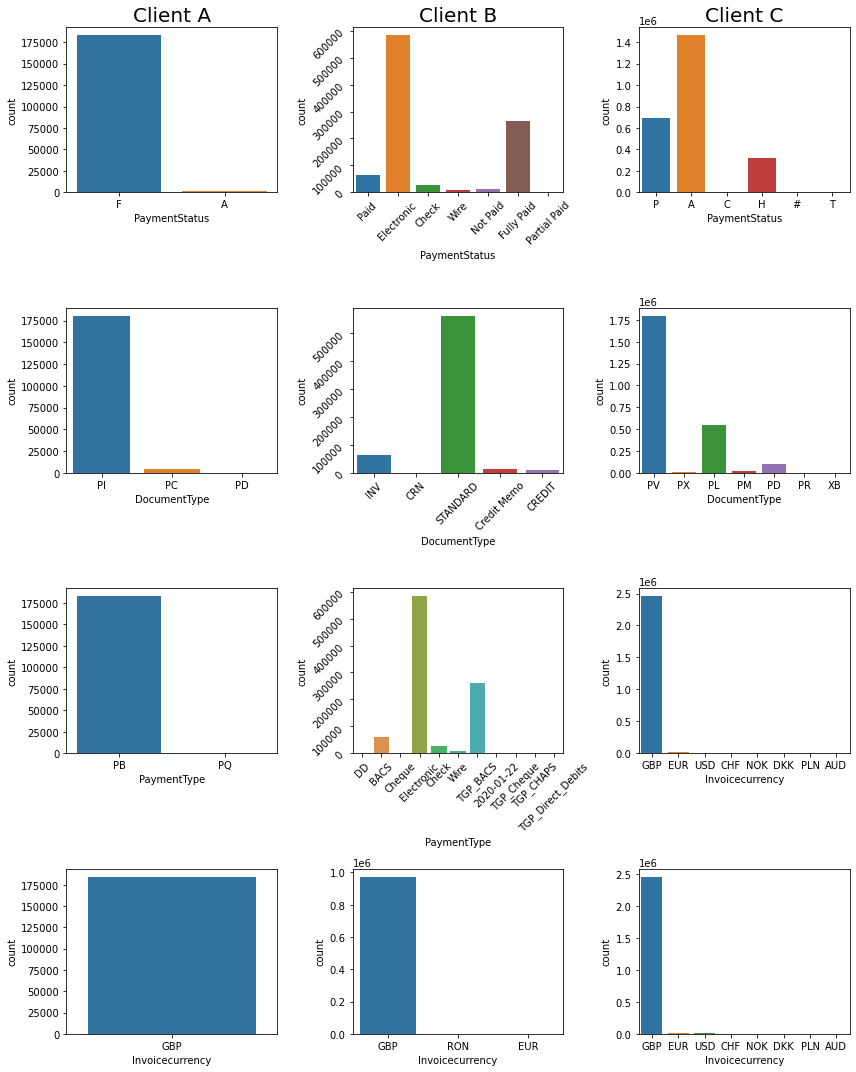

In [43]:
fig, ax = plt.subplots(4,3, figsize=(12,15))

sns.countplot(data=dfa, x="PaymentStatus", ax=ax[0,0])
ax[0,0].set_title("Client A", fontsize=20)
sns.countplot(data=dfa, x="DocumentType", ax=ax[1,0])
sns.countplot(data=dfa, x="PaymentType", ax=ax[2,0])           
sns.countplot(data=dfa, x="Invoicecurrency", ax=ax[3,0])


sns.countplot(data=dfb, x="PaymentStatus", ax=ax[0,1])
ax[0,1].set_title("Client B", fontsize=20)
ax[0,1].tick_params(labelrotation=45)
sns.countplot(data=dfb, x="DocumentType", ax=ax[1,1])
ax[1,1].tick_params(labelrotation=45)
sns.countplot(data=dfb, x="PaymentType", ax=ax[2,1])
ax[2,1].tick_params(labelrotation=45)
sns.countplot(data=dfb, x="Invoicecurrency", ax=ax[3,1])



sns.countplot(data=dfc, x="PaymentStatus", ax=ax[0,2])
ax[0,2].set_title("Client C", fontsize=20)
sns.countplot(data=dfc, x="DocumentType", ax=ax[1,2])
sns.countplot(data=dfc, x="Invoicecurrency", ax=ax[2,2])            
sns.countplot(data=dfc, x="Invoicecurrency", ax=ax[3,2])
              
plt.tight_layout()